### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
# Reading data from remote link
rl= pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
rl.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
rl.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


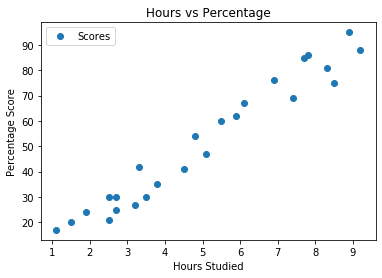

In [4]:
# Plotting the distribution of scores
rl.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

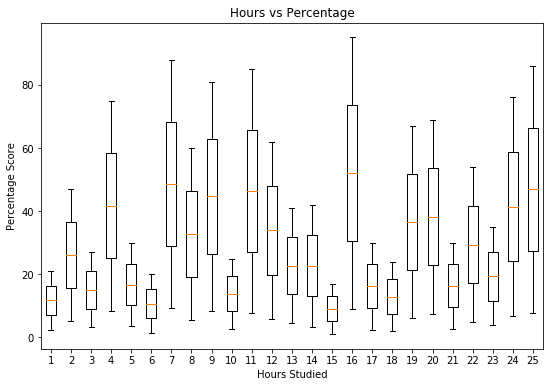

In [5]:
##Box Plot 
import matplotlib.pyplot as plt
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
bp = ax.boxplot(rl)

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
X = rl.iloc[:,:-1].values  
y = rl.iloc[:,1].values  
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [30]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=17) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [31]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
regressor.coef_
print("Dataset Training complete.")

Dataset Training complete.


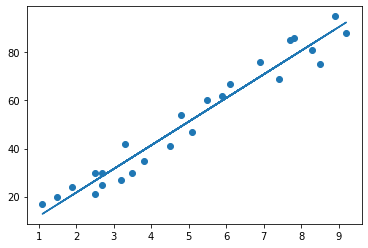

In [32]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [33]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[2.7]
 [2.5]
 [6.1]
 [7.4]
 [1.5]
 [5.9]
 [4.8]]


In [34]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': (y_test), 'Predicted': (y_pred)})  
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,2.7,30.0,28.544308
1,2.5,21.0,26.578358
2,6.1,67.0,61.965451
3,7.4,69.0,74.744123
4,1.5,20.0,16.748610
5,5.9,62.0,59.999501
6,4.8,54.0,49.186779


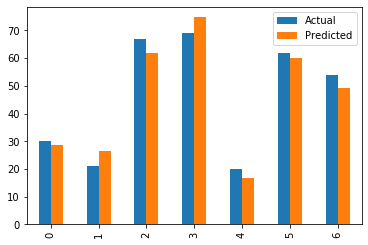

In [35]:
df.plot(kind='bar')

In [39]:
# You can also test with your own data
hr=float(input("Enter no of Hours Studied: "))
VTL = [] 
VTL.extend([hr]) 
LTL = [VTL] 
prediction = regressor.predict(LTL) 
print('MODEL accuracy is : ',regressor.score(X_test,y_test))
b=(np.round(prediction, 2))
print('Pridicted Score is: :',b) 

Enter no of Hours Studied: 9.25
MODEL accuracy is :  0.9545746837418855
Pridicted Score is: : [92.93]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [40]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_pred, y_test)) 

Mean Absolute Error: 3.98254744978039
